### Sayid Muhamad Ridho Fadilah - 1301154312

## 1. Analisis Masalah

_Travelling Salesman Problem_ atau biasa disingkat dengan TSP merupakan sebuah permasalahan diskrit pada bidang komputasi. Permasalahan TSP sering dijumpai di kehidupan nyata. Salah satunya adalah bagaimana seorang tukang pos mengirimkan surat-surat ke alamat tujuan dengan waktu sesingkat-singkatnya dan total jarak sependek mungkin. Tidaklah mudah melakukan pencarian solusi dari permasalahan TSP karena ruang solusi dari permasalahan TSP adalah sebesar $\frac{(N-1)!}{2}$, dengan kompleksitas $N$ adalah banyaknya kota/rumah/tempat yang akan dikunjungi.

TSP dapat didapat solusi optimal dengan menggunakan metode metode optimasi yang ada seperti _Genetic Algorithm_ (GA), _Djikstra_, _Brute Force_, dan lain-lain. Pada GA, _Djikstra_, _Brute Force_ membutuhkan waktu komputasi yang cukup lama untuk mendapatkan solusi optimal. Hal ini tidak memungkinkan untuk permasalahan di dunia nyata yang membutuhkan penyelasaian masalah TSP yang cepat. Sehingga diperlukan sebuah algoritma/metode baru yang dapat membantu menyelesaikan permasalahan TSP. Pada laporan ini penulis menggunakan algoritma _Ant System_ yang ditemukan oleh Marco Dorigo pada tahun 1996 yang telah menyelesaikan permasalahan TSP.

## 2. Desain Program

_Ant System_ merupakan sebuah metode yang terinspirasi dari semut dalam mencari makanan. Setiap semut akan meninggal feromon yang merupakan penanda/jejak rute yang telah dilewatinya. Setiap semut akan memilih kota berikutnya yang akan dikunjungi tergantung dengan nilai probabilitas dari setiap kota yang tersedia. Setelah semua semut mendapatkan suatu rute, akan dilakukan perhitungan panjang rute tersebut. Selanjutnya feromon akan diperbaharui sesuai dengan persamaan yang telah dijelaskan oleh Marco Dorigo. Desain program dapat dilihat di bagian bawah.

1. Inisialisasi
Pada proses ini akan menginisialisasi setiap parameter yang dibutuhkan pada _Ant System_ mulai dari $\alpha$, $\beta$, $Q$, dan $\rho$.

 - $\alpha$ : faktor feromon yang mempengaruhi semut dalam menentukan kota selanjutnya
 - $\beta$ : faktor _visibility_ yang mempengaruhi semut dalam menentukan kota selanjutnya
 - $Q$ : konstanta yang berkaitan dengan panjang sebuah rute
 - $\rho$ : koeefisien evaporasi feromon setiap jalur
 
2. Sebar semut disetiap kota secara acak dengan ketentuan satu semut mendapatkan tepat satu kota.

3. Lakukan pencarian rute untuk setiap semut dengan probabilitas di bawah, dimana $\tau$ adalah intensitas feromon, $\eta$ adalah _visibility_, dan $P_{ij}$ merupakan hasil probabiltas dari kota $i$ ke kota $j$

    $$ P_{ij}^k(t) = \frac{[\tau_{ik}(t)]^{\alpha} \cdot [\eta_{ik}]^{\beta}}  
{\Sigma_{\ k\  \in\ allowed_k} [\tau_{ik}(t)]^{\alpha} \cdot [\eta_{ik}]^{\beta} } $$

4. Hitung panjang rute dari setiap semut dan seberapa besar perubahan feromon dari setiap jalur yang dilewati dengan rumus perubahan dibawah

    $$ {\Delta\tau}_{ij} = \frac{Q}{PanjangTour}$$

5. Perbarui nilai feromon untuk setiap jalur dengan $\Delta\tau$ yang telah di perbaharui pada bagian ke-4. Rumus perubahan nilai feromon dapat dilihat pada rumus dibawah
   
   $$\tau_{ij} = (1-\rho) \tau_{ij} + {\Delta\tau}_{ij} $$

6. Lakukan secara terus menerus dari _step_ 2 hingga iterasi selesai
## 3. Source Code

In [24]:
#import lib yang dibutuhkan
import numpy as np
import pandas as pd
from random import *
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix

In [25]:
#definisikan fungsi yang digunakan
def euclideanDistance(data1,data2):
    return ((data1[1]-data2[1])**2 + (data1[2]-data2[2])**2)**0.5

def updateRoute(tau,dist,alpha,beta,i,ant):
    listAvailable = []
    for j in range(len(data)):
        listAvailable.append(j)
    route = [ant[i]]
    listAvailable.remove(route[0])
    #pilih route selanjutnya dengan menggunakan probabilitas yang telah ditentukan
    while listAvailable != []:
        temp = []
        for j in listAvailable:
            probs = (tau[route[len(route)-1]][j]**alpha)*((1/dist[route[len(route)-1]][j])**beta)
            temp.append([probs,j])
        total = sum([x[0] for x in temp])
        probs = np.asarray([x[0] for x in temp])/total
        for j in range(len(temp)):
            temp[j][0] = probs[j]
        terbaik = max(temp)
        listAvailable.remove(terbaik[1])
        route.append(terbaik[1])
    route.append(route[0])
    return route

def updateDeltaTau(routeAllAnt,dist,qiu,bestRoute):
    allCost = []
    bestNow = []
    for i in routeAllAnt:
        cost = 0
        #menghitung cost setiap ant
        for j in range(len(i)-1):
            cost += dist[i[j]][i[j+1]]
        allCost.append([cost,i])
    bestNow = min(allCost)
    if (bestRoute == []):
        bestRoute = bestNow
    elif (bestNow[0]<bestRoute[0]):
        bestRoute = bestNow
    deltaTau = np.zeros((len(data),len(data)))
    counter = -1
    for i in routeAllAnt:
        counter += 1
        for j in range(len(i)-1):
            delta = qiu/allCost[counter][0]
            deltaTau[i[j]][i[j+1]] += delta
            if (len(dist)==96):
                deltaTau[i[j+1]][i[j]] += delta
    return allCost,deltaTau,bestRoute

def antSystem(alpha,beta,tau,qiu,cycle,evapCoef,data,dist):
    best = []
    meanCost = []
    bestRoute = []
    for x in range(cycle):
        ant = []
        # LANGKAH 2 SEBAR SEMUT KE MASING MASING CITY SECARA ACAK
        for i in range(len(data)):
            ant.append(randint(0,len(data)-1))

        #LANGKAH 3 Tentukan route setiap semut
        routeAllAnt = []
        for i in range(len(ant)):
            routeAllAnt.append(updateRoute(tau,dist,alpha,beta))
    
        #LANGKAH 4 HITUNG TUR MASING MASING SEMUT DAN HITUNG NILAI DELTA TAU          
        allCost,deltaTau,bestRoute = updateDeltaTau(routeAllAnt,dist,qiu,bestRoute)
    
        # LANGKAH 5 UPDATE TAU
        tau = (((1-evapCoef)*tau)+deltaTau)
    
        #untuk keperluan visualization
        print (x,bestRoute)
        best.append(bestRoute[0])
        antCost = [y[0] for y in allCost]
        meanCost.append(sum(antCost)/len(antCost))
    return best,bestRoute,meanCost

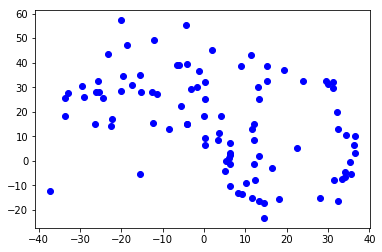

In [85]:
# dataF = pd.read_csv('Swarm016.tsp',delimiter=' ') #jalan kan ini jika ingin menggunakan data 96 city
dataF = pd.read_csv('Swarm096.tsp',delimiter=' ') #jalan kan ini jika ingin menggunakan data 16 city
data = pd.DataFrame.as_matrix(dataF)
dt = dataF.drop(['ID'],axis=1)
dist = distance_matrix(dt,dt,p=2) #melakukan perhitungan jarak antar kota
plt.plot(dt['X'],dt['Y'],'bo')

## Parameter pada Ant System

In [96]:
#LANGKAH 1 INISIALISASI DAN SETTING PARAMETER
alpha = 15
beta = 20
qiu = 0.8
cycle = 50
evapCoef = 0.01

In [98]:
# best, bestRoute, meanCost = antSystem(alpha,beta,tau,qiu,cycle,evapCoef,data,dist)
# Main Program
terbaik = []
for iterasi in range(30):
    tau = 1 *np.ones((len(data),len(data)))
    best = []
    meanCost = []
    bestRoute = []
    for x in range(cycle):
        ant = []
        # LANGKAH 2 SEBAR SEMUT KE MASING MASING CITY SECARA ACAK
        for i in range(len(data)):
            ant.append(randint(0,len(data)-1))

        #LANGKAH 3 Tentukan route setiap semut
        routeAllAnt = []
        for i in range(len(ant)):
            routeAllAnt.append(updateRoute(tau,dist,alpha,beta,i,ant))

        #LANGKAH 4 HITUNG TUR MASING MASING SEMUT DAN HITUNG NILAI DELTA TAU          
        allCost,deltaTau,bestRoute = updateDeltaTau(routeAllAnt,dist,qiu,bestRoute)

        # LANGKAH 5 UPDATE TAU
        tau = (((1-evapCoef)*tau)+deltaTau)

        #untuk keperluan visualization
#         print (x,bestRoute)
        best.append(bestRoute[0])
        antCost = [y[0] for y in allCost]
        meanCost.append(sum(antCost)/len(antCost))
    terbaik.append(bestRoute[0])
print ('rata-rata akurasi =',sum(terbaik)/len(terbaik))

rata-rata akurasi = 562.5964441663348


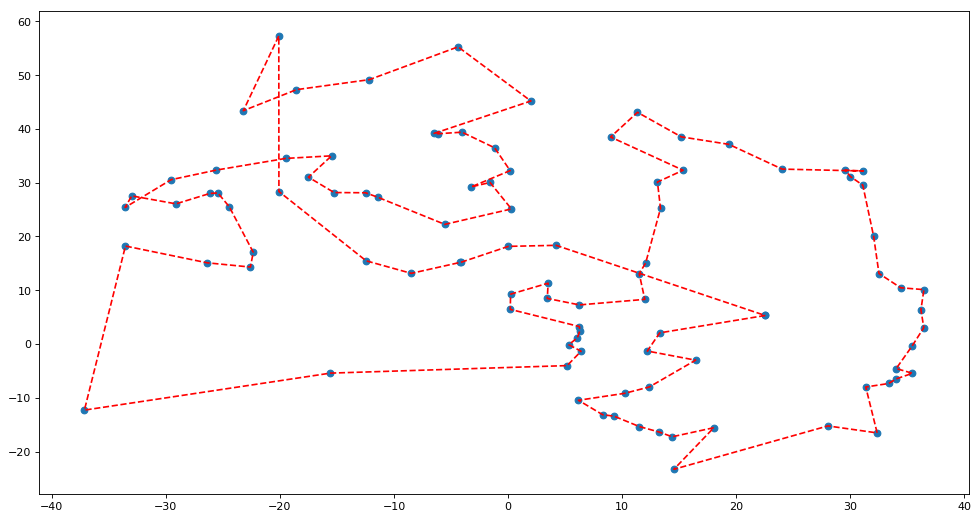

In [99]:
#plot best route
optimalRoute = dataF.iloc[bestRoute[1]]
fig, ax = plt.subplots(dpi=80, figsize=(15,8))
ax.plot(optimalRoute['X'],optimalRoute['Y'],'r--')
ax.scatter(optimalRoute['X'],optimalRoute['Y'])

Text(0.5,1,'Best Solution')

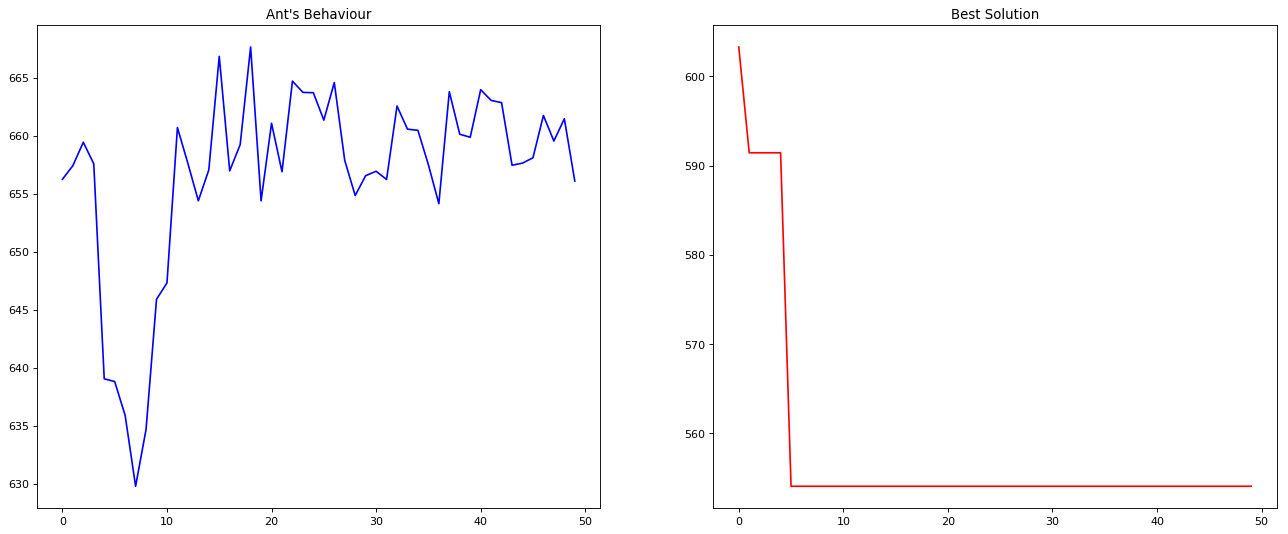

In [100]:
#BEHAVIOUR ANT
fig, (ax1,ax2) = plt.subplots(1, 2, dpi=80, figsize=(20,8))
ax1.plot(meanCost,'b'); ax1.set_title("Ant\'s Behaviour")
ax2.plot(best,'r'); ax2.set_title("Best Solution")